In [1]:
from spineq.data_fetcher import lad20nm_to_lad20cd
from spineq.optimise import calc_coverage, calc_oa_weights, optimise
from spineq.plotting import plot_optimisation_result

In [2]:
lad20nm = "Newcastle upon Tyne"
lad20cd = lad20nm_to_lad20cd(lad20nm)

n_sensors = 20
theta = 500

pop_age_groups = {"pop_total": {"min": 0, "max": 90, "weight": 0}}
population_weight = 0
workplace_weight = 1

title = "Workplace Network"

/Users/jroberts/opt/anaconda3/envs/spatial-inequality/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
result = optimise(
    lad20cd=lad20cd,
    n_sensors=n_sensors,
    theta=theta,
    pop_age_groups=pop_age_groups,
    population_weight=population_weight,
    workplace_weight=workplace_weight,
)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.16
Placing sensor 2 out of 20 ... coverage = 0.22
Placing sensor 3 out of 20 ... coverage = 0.27
Placing sensor 4 out of 20 ... coverage = 0.31
Placing sensor 5 out of 20 ... coverage = 0.35
Placing sensor 6 out of 20 ... coverage = 0.38
Placing sensor 7 out of 20 ... coverage = 0.41
Placing sensor 8 out of 20 ... coverage = 0.43
Placing sensor 9 out of 20 ... coverage = 0.45
Placing sensor 10 out of 20 ... coverage = 0.47
Placing sensor 11 out of 20 ... coverage = 0.48
Placing sensor 12 out of 20 ... coverage = 0.50
Placing sensor 13 out of 20 ... coverage = 0.51
Placing sensor 14 out of 20 ... coverage = 0.52
Placing sensor 15 out of 20 ... coverage = 0.53
Placing sensor 16 out of 20 ... coverage = 0.55
Placing sensor 17 out of 20 ... coverage = 0.56
Placing sensor 18 out of 20 ... coverage = 0.57
Placing sensor 19 out of 20 ... coverage = 0.58
Placing sensor 20 out of 20 ... coverage = 0.59


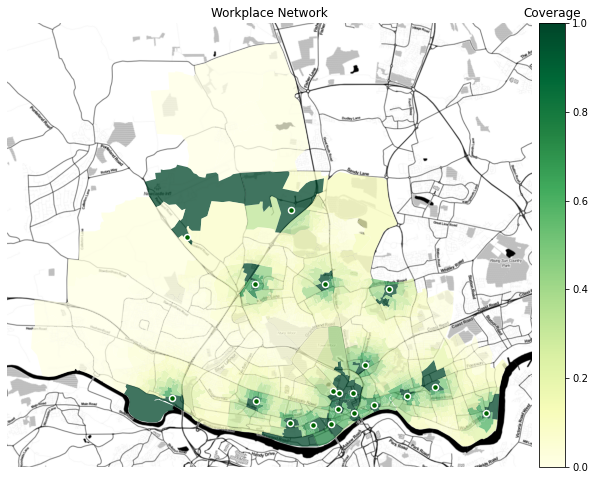

In [4]:
plot_optimisation_result(result, title=title)

In [5]:
oa_weight = calc_oa_weights(lad20cd=lad20cd, population_weight=1, workplace_weight=0)
cov = calc_coverage(lad20cd, result["sensors"], oa_weight, theta=theta)
print("total population coverage: {:.2f}".format(cov["total_coverage"]))

total population coverage: 0.23


In [6]:
oa_weight = calc_oa_weights(lad20cd=lad20cd, population_weight=0, workplace_weight=1)
cov = calc_coverage(lad20cd, result["sensors"], oa_weight, theta=theta)
print("place of work coverage: {:.2f}".format(cov["total_coverage"]))

place of work coverage: 0.59


In [7]:
oa_weight = calc_oa_weights(
    lad20cd=lad20cd,
    population_weight=1,
    workplace_weight=0,
    pop_age_groups={"pop_children": {"min": 0, "max": 16, "weight": 1}},
)
cov = calc_coverage(lad20cd, result["sensors"], oa_weight, theta=theta)
print("children <= 16 coverage: {:.2f}".format(cov["total_coverage"]))

children <= 16 coverage: 0.21


In [8]:
oa_weight = calc_oa_weights(
    lad20cd=lad20cd,
    population_weight=1,
    workplace_weight=0,
    pop_age_groups={"pop_elderly": {"min": 70, "max": 90, "weight": 1}},
)
cov = calc_coverage(lad20cd, result["sensors"], oa_weight, theta=theta)
print("adults >= 70 coverage: {:.2f}".format(cov["total_coverage"]))

adults >= 70 coverage: 0.17
